#### Writing data to the file.

In [1]:
import requests
import json
import csv
import time

api_key = 'Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6'
base_url = 'https://api.nytimes.com/svc/archive/v1/'

start = 1885
end = 1889

keywords = ['anarchist', 'anarchists', 'anarchism']
collection = [] 

url_template = f'{base_url}%d/%d.json?api-key={api_key}'

print("Program is running...")

for year in range(start, end + 1):
    for month in range(1, 13):  # Fetch for all 12 months
        full_url = url_template % (year, month)
        print(full_url)
            
        response = requests.get(full_url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
          
            for article in data['response']['docs']:
                headline = article['headline']['main'].lower()
                
                found = any(word in headline for word in keywords)
                if found:
                    collection.append(article)
                    
            time.sleep(13)  # Sleep for 13 seconds to avoid rate limits
        
        else:
            print(f"Error: {response.status_code}, {response.text}")

# Write data to CSV file
csv_file_path = 'nyt_headlines.csv'
fieldnames = ['publish_date', 'headline']

with open(csv_file_path, 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write header only if the file is empty
    if csvfile.tell() == 0:
        writer.writeheader()
    
    for article in collection:
        publish_date = article['pub_date']
        headline = article['headline']['main']
        writer.writerow({'publish_date': publish_date, 'headline': headline})

print("Program is done. Data written to nyt_headlines.csv.")


Program is running...
https://api.nytimes.com/svc/archive/v1/1885/1.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/2.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/3.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/4.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/5.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/6.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/7.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/8.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/9.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/10.json?api-key=Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6
https://api.nytimes.com/svc/archive/v1/1885/11.json?api-k

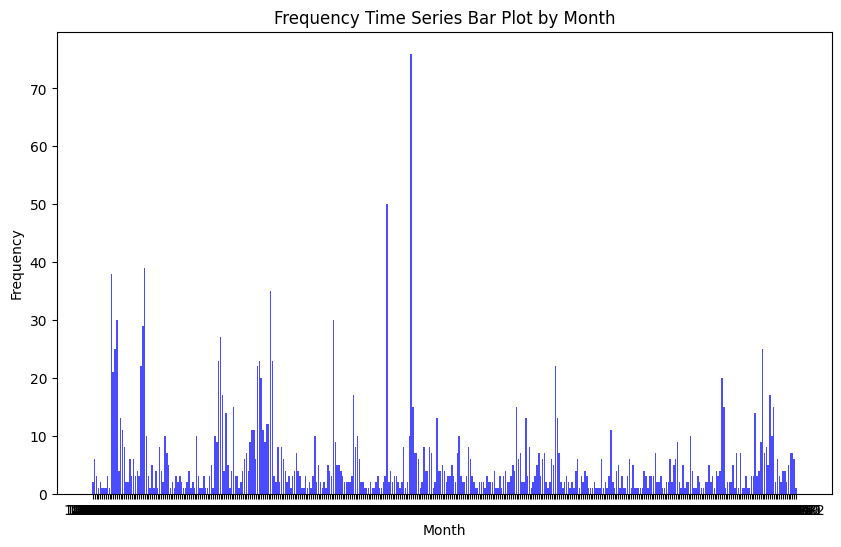

In [7]:
import csv
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

# Read data from CSV file
csv_file_path = 'nyt_headlines.csv'
fieldnames = ['publish_date', 'headline']
collection = []

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        publish_date_str = row['publish_date']
        
        # Parse the date string into a datetime object
        publish_date = datetime.strptime(publish_date_str, '%Y-%m-%dT%H:%M:%S%z')
        
        # Extract the month information
        month_of_publish = publish_date.strftime('%Y-%m')
        
        collection.append({'month': month_of_publish, 'headline': row['headline']})

# Create a frequency time series plot by month
month_counts = Counter(article['month'] for article in collection)
months, counts = zip(*sorted(month_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='blue', alpha=0.7)
plt.title('Frequency Time Series Bar Plot by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

# plt.xticks(rotation=45)

# plt.tight_layout()
plt.show()


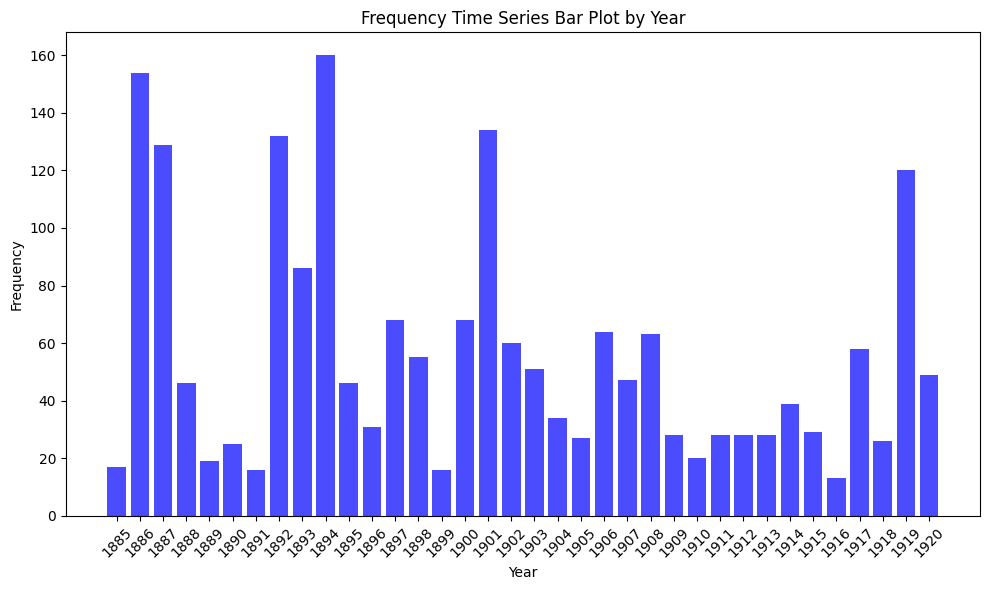

In [3]:
import csv
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

# Read data from CSV file
csv_file_path = 'nyt_headlines.csv'
fieldnames = ['publish_date', 'headline']
collection = []

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        publish_date_str = row['publish_date']
        
        # Parse the date string into a datetime object
        publish_date = datetime.strptime(publish_date_str, '%Y-%m-%dT%H:%M:%S%z')
        
        # Extract the year information
        year_of_publish = publish_date.strftime('%Y')
        
        collection.append({'year': year_of_publish, 'headline': row['headline']})

# Create a frequency time series bar plot by year
year_counts = Counter(article['year'] for article in collection)
years, counts = zip(*sorted(year_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='blue', alpha=0.7)
plt.title('Frequency Time Series Bar Plot by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


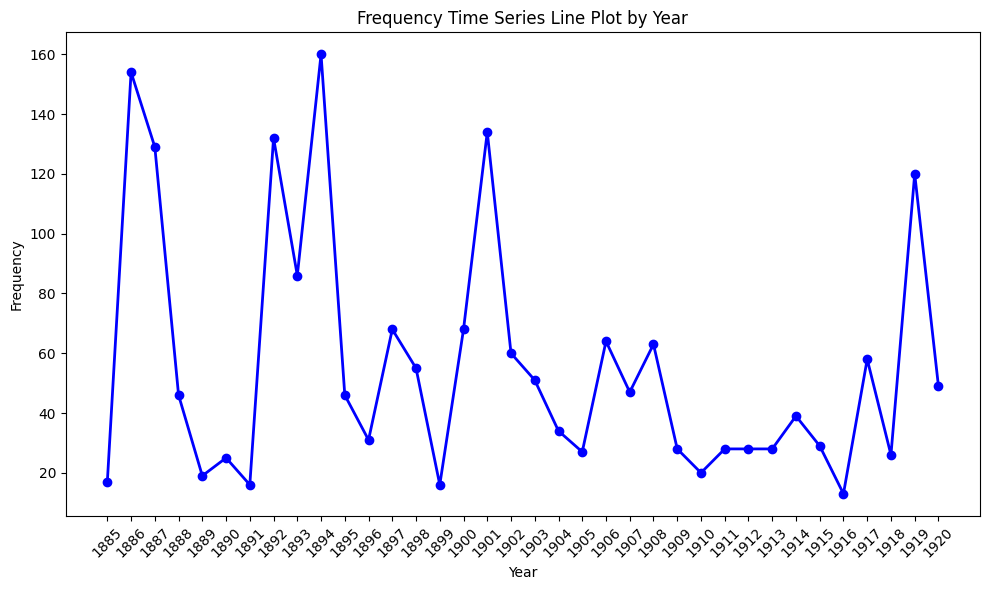

In [4]:
import csv
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

# Read data from CSV file
csv_file_path = 'nyt_headlines.csv'
fieldnames = ['publish_date', 'headline']
collection = []

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        publish_date_str = row['publish_date']
        
        # Parse the date string into a datetime object
        publish_date = datetime.strptime(publish_date_str, '%Y-%m-%dT%H:%M:%S%z')
        
        # Extract the year information
        year_of_publish = publish_date.strftime('%Y')
        
        collection.append({'year': year_of_publish, 'headline': row['headline']})

# Create a frequency time series line plot by year
year_counts = Counter(article['year'] for article in collection)
years, counts = zip(*sorted(year_counts.items()))

plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Frequency Time Series Line Plot by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
